In [1]:
# Import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

In [2]:
# Load data from Day-2
df_1 = pd.read_csv(r"C:/Users/uttam/Desktop/CME660/Testday2_merged.csv")
# Load data from Day-3
df_2 = pd.read_csv(r"C:/Users/uttam/Desktop/CME660/Testday3_merged.csv")
# Load data from Day-4
df_3 = pd.read_csv(r"C:/Users/uttam/Desktop/CME660/Testday4_merged.csv")
# Concatenate the data
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [3]:
# Exploratory Data Analysis
df.describe()

,FIC301,FIC302,LI405,LI502,PT312,VC303,VC401,VC403,VC404,VC405,...,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,LI505
count,45420.000000,45420.000000,45420.000000,24120.0,45420.000000,45420.000000,45420.0,45420.0,45420.0,45420.0,...,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,21300.0
mean,0.071180,0.062241,0.679018,0.0,0.163804,0.002576,0.0,0.0,0.0,0.0,...,1.019045,3.358363,0.559113,0.997311,22.352009,61.782958,98.623634,9.275199,1.426527,0.0
std,0.257128,0.241596,0.466859,0.0,0.370102,0.050689,0.0,0.0,0.0,0.0,...,0.030180,5.135456,0.567385,0.029712,7.369957,1.457677,0.173581,11.556427,0.012909,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.845333,0.000000,-4.607517,0.822942,0.030689,49.623772,97.675377,0.000000,1.388638,0.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.017692,0.000414,0.070511,0.996003,20.038310,61.755878,98.549589,2.283776,1.419087,0.0
50%,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.021233,0.043302,0.397561,0.999314,25.058850,61.981190,98.664036,6.556579,1.425808,0.0
75%,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.024938,6.983966,0.942655,1.002923,27.315350,62.153648,98.712509,8.254080,1.439326,0.0
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.328773,43.850960,2.840868,1.307652,34.459080,75.759613,99.930847,56.039059,1.448196,0.0


In [4]:
df.columns

Index(['FIC301', 'FIC302', 'LI405', 'LI502', 'PT312', 'VC303', 'VC401',
       'VC403', 'VC404', 'VC405', 'VC406', 'VLV303', 'AirIn', 'Air.T', 'Air.P',
       'WaterIn', 'Water.T', 'Water.Density', 'Mixture.zone.P',
       'riser.outlet.P', 'P.topsep', 'FR.topsep.gas', 'FR.topsep.liquid',
       'P_3phase', 'Air.Valve', 'Water.level', 'Water.coalescer',
       'Water.level.valve', 'water.tank.level', 'Fault', 'LI505'],
      dtype='object')

In [5]:
df = df.loc[:,['AirIn', 'Air.T', 'Air.P',
       'WaterIn', 'Water.T', 'Water.Density', 'Mixture.zone.P',
       'riser.outlet.P', 'P.topsep', 'FR.topsep.gas', 'FR.topsep.liquid',
       'P_3phase', 'Air.Valve', 'Water.level', 'Water.coalescer',
       'Water.level.valve', 'water.tank.level', 'Fault']]

In [6]:
df.describe()

,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level
count,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000,45420.000000
mean,120.244962,17.579774,1.754868,0.545004,23.426888,996.696162,1.494589,1.109878,1.019045,3.358363,0.559113,0.997311,22.352009,61.782958,98.623634,9.275199,1.426527
std,42.618978,1.086663,0.947866,0.751641,1.960987,1.209464,0.333043,0.165797,0.030180,5.135456,0.567385,0.029712,7.369957,1.457677,0.173581,11.556427,0.012909
min,16.019110,15.107760,0.607549,-0.007640,18.197229,990.697327,0.997974,0.820029,0.845333,0.000000,-4.607517,0.822942,0.030689,49.623772,97.675377,0.000000,1.388638
25%,118.268898,16.704707,1.281357,0.098050,23.249670,996.235275,1.242075,1.014582,1.017692,0.000414,0.070511,0.996003,20.038310,61.755878,98.549589,2.283776,1.419087
50%,120.583950,17.850080,1.507924,0.495899,23.752180,996.706360,1.416394,1.037709,1.021233,0.043302,0.397561,0.999314,25.058850,61.981190,98.664036,6.556579,1.425808
75%,149.015793,18.249603,1.736749,0.500112,24.663151,997.657013,1.519924,1.153582,1.024938,6.983966,0.942655,1.002923,27.315350,62.153648,98.712509,8.254080,1.439326
max,210.018494,20.017281,7.269874,3.673232,26.674419,999.480774,3.923677,3.183747,1.328773,43.850960,2.840868,1.307652,34.459080,75.759613,99.930847,56.039059,1.448196


In [7]:
df.drop('Water.Density', axis = 1, inplace = True) # Drop because it is mostly constant througout the process
df.head()

,AirIn,Air.T,Air.P,WaterIn,Water.T,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
0,121.053596,15.68166,1.301107,0.096309,23.748079,1.240097,1.025907,1.027175,0.000491,0.064845,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal
1,120.982101,15.68156,1.298735,0.096320,23.745350,1.236252,1.027934,1.027277,0.000483,0.095639,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal
2,120.864098,15.68147,1.296362,0.096331,23.742620,1.240946,1.035563,1.028881,0.000476,0.095639,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal
3,120.746002,15.68138,1.301659,0.096342,23.739889,1.238252,1.030079,1.028640,0.000468,0.076789,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal
4,120.627998,15.68129,1.299090,0.096354,23.737160,1.231918,1.026742,1.028400,0.000461,0.076789,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal


In [8]:
df.dropna() # drop NaN values if any 
df.reset_index(drop=True, inplace=True) # Reset the indexes
df

,AirIn,Air.T,Air.P,WaterIn,Water.T,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
0,121.053596,15.681660,1.301107,0.096309,23.748079,1.240097,1.025907,1.027175,0.000491,0.064845,1.005916,25.092310,62.243111,98.642677,2.257356,1.443121,Normal
1,120.982101,15.681560,1.298735,0.096320,23.745350,1.236252,1.027934,1.027277,0.000483,0.095639,1.006192,25.099390,62.235279,98.644371,2.278575,1.443152,Normal
2,120.864098,15.681470,1.296362,0.096331,23.742620,1.240946,1.035563,1.028881,0.000476,0.095639,1.006467,25.106461,62.227440,98.646057,2.299793,1.443183,Normal
3,120.746002,15.681380,1.301659,0.096342,23.739889,1.238252,1.030079,1.028640,0.000468,0.076789,1.006743,25.113529,62.219608,98.647758,2.321012,1.443214,Normal
4,120.627998,15.681290,1.299090,0.096354,23.737160,1.231918,1.026742,1.028400,0.000461,0.076789,1.006743,25.120600,62.262520,98.649452,2.399387,1.443244,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45415,49.844070,18.470489,3.176453,3.490162,23.082979,2.401121,1.542449,1.017159,0.669192,1.930284,0.998452,18.926540,61.940659,98.330780,40.822701,1.404278,Normal
45416,49.793999,18.470881,3.176823,3.491043,23.281080,2.397678,1.583219,1.018070,0.669192,2.010356,0.998595,18.928560,61.990730,98.331093,40.464310,1.404278,Normal
45417,49.822609,18.471270,3.173231,3.491924,23.281080,2.463364,1.598001,1.017990,0.461273,1.924416,0.998739,18.930580,62.264912,98.331390,40.509941,1.404278,Normal
45418,49.800362,18.471649,3.173463,3.492805,23.281080,2.448531,1.623512,1.017910,0.461273,1.555958,0.998883,18.932600,61.940659,98.331703,40.802071,1.404278,Normal


In [9]:
df.columns

Index(['AirIn', 'Air.T', 'Air.P', 'WaterIn', 'Water.T', 'Mixture.zone.P',
       'riser.outlet.P', 'P.topsep', 'FR.topsep.gas', 'FR.topsep.liquid',
       'P_3phase', 'Air.Valve', 'Water.level', 'Water.coalescer',
       'Water.level.valve', 'water.tank.level', 'Fault'],
      dtype='object')

In [10]:
# Divide X and y variables
X = df.loc[:,['AirIn', 'Air.T', 'Air.P', 'WaterIn', 'Water.T', 'Mixture.zone.P',
       'riser.outlet.P', 'P.topsep', 'FR.topsep.gas', 'FR.topsep.liquid',
       'P_3phase', 'Air.Valve', 'Water.level', 'Water.coalescer',
       'Water.level.valve', 'water.tank.level']] # The initial input features 
y = df.loc[:,'Fault'] # the target varialbe 

In [11]:
feature_names = ['AirIn', 'Air.T', 'Air.P', 'WaterIn', 'Water.T', 'Mixture.zone.P',
       'riser.outlet.P', 'P.topsep', 'FR.topsep.gas', 'FR.topsep.liquid',
       'P_3phase', 'Air.Valve', 'Water.level', 'Water.coalescer',
       'Water.level.valve', 'water.tank.level']
df.Fault.unique() # Fault catagories/types

array(['Normal', 'Air blockage', 'Air leakage', 'Diverted flow',
       'Slugging'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y) # Map the catagorical values into integer values

# Display the mappings
print("Mapping of categories to integers:")
for category, integer in zip(le.classes_, range(len(le.classes_))):
    print(f"{category} -> {integer}")

target_names = df.Fault.unique()

Mapping of categories to integers:
Air blockage -> 0
Air leakage -> 1
Diverted flow -> 2
Normal -> 3
Slugging -> 4


In [13]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # Scaling the input data

In [14]:
# Feature Selection using Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the base estimator (here a linear estimator)
model = LogisticRegression(max_iter=40000)
n_features = 10 # Number of features to select for training

# Initialize RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit RFE to the scaled data
rfe.fit(X_scaled, y_encoded)

# Transform the data to the selected features
X_rfe = rfe.transform(X_scaled)

# Get the names of the selected features
selected_features_rfe = np.array(feature_names)[rfe.support_]

print("Selected Features by RFE:", selected_features_rfe) # All the selected features are ranked 1

Selected Features by RFE: ['AirIn' 'Air.T' 'Air.P' 'WaterIn' 'Mixture.zone.P' 'P.topsep'
 'FR.topsep.gas' 'P_3phase' 'Air.Valve' 'water.tank.level']


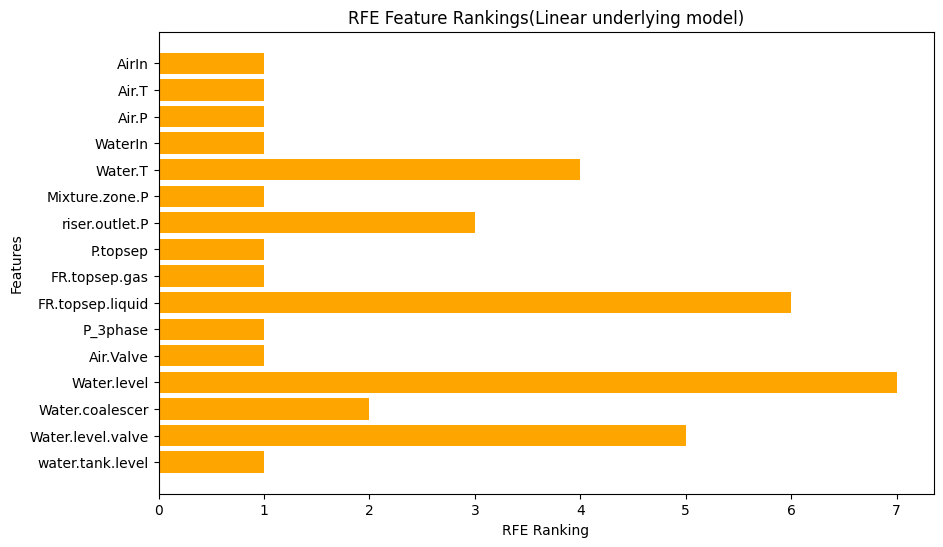

In [15]:
# Plot ranking from RFE
plt.figure(figsize=(10, 6))
plt.barh(feature_names, rfe.ranking_, color='orange')
plt.xlabel('RFE Ranking')
plt.ylabel('Features')
plt.title('RFE Feature Rankings(Linear underlying model)')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

In [16]:
# Filter out the selected features
X = df.loc[:,selected_features_rfe]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale the features for training the model

In [17]:
# Split the data (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=12)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the training dataset
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Making Predictions on training and testing data 
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)

In [19]:
from sklearn.metrics import classification_report

# Classification Report on training data
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7163
           1       0.94      0.83      0.88      6582
           2       0.87      0.92      0.89      9209
           3       0.79      0.79      0.79      9519
           4       0.99      0.95      0.97      3863

    accuracy                           0.89     36336
   macro avg       0.91      0.90      0.90     36336
weighted avg       0.89      0.89      0.89     36336



In [20]:
# Classification report on testing data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1717
           1       0.95      0.82      0.88      1697
           2       0.87      0.91      0.89      2310
           3       0.78      0.80      0.79      2380
           4       0.99      0.95      0.97       980

    accuracy                           0.88      9084
   macro avg       0.90      0.89      0.90      9084
weighted avg       0.89      0.88      0.88      9084



In [21]:
# Calculate accuracy score for test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.88
Confusion Matrix:
 [[1701    0    0   16    0]
 [  21 1389    3  284    0]
 [   0    2 2106  202    0]
 [  96   70  301 1900   13]
 [   0    0    4   44  932]]


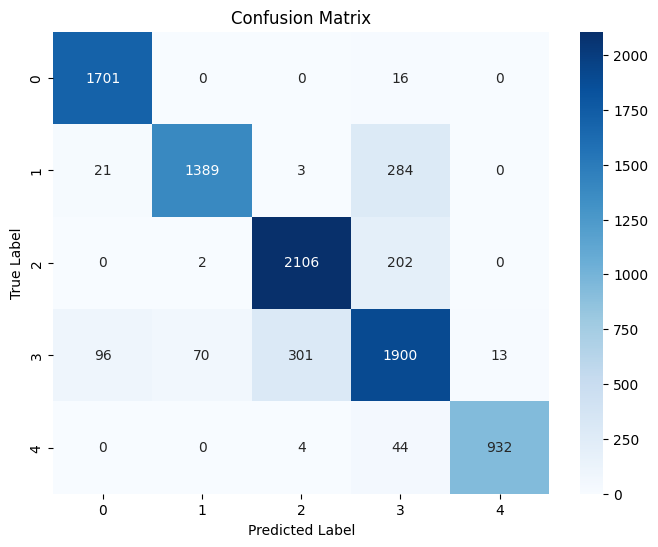

In [22]:
# Visualizing the Confusion Matrix of test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

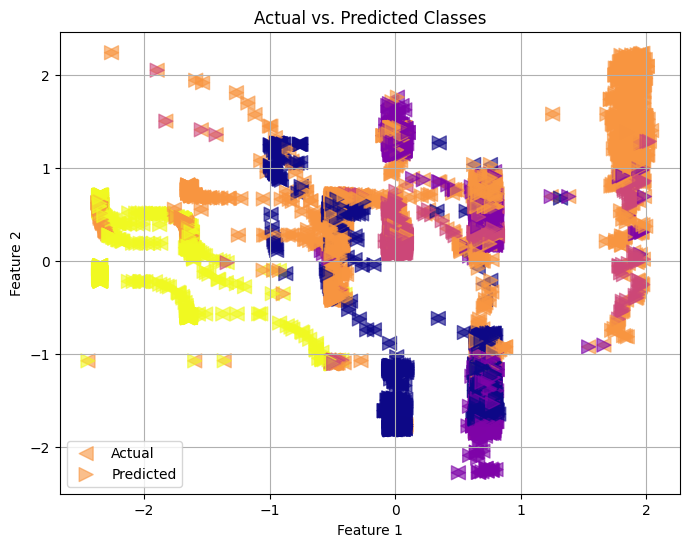

In [23]:
# Create a scatter plot to compare actual vs predicted classes
plt.figure(figsize=(8, 6))
# Scatter plot for actual classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='plasma', marker='<', label='Actual', alpha=0.6, s=100)

# Scatter plot for predicted classes with a different marker
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='plasma',  marker='>', label='Predicted', alpha=0.6, s=100)

# Set plot title and labels
plt.title("Actual vs. Predicted Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Add a legend to differentiate between actual and predicted classes
plt.legend(loc='best')

# Show the plot
plt.grid()
plt.show()

### Non_linear Technique

In [24]:
### Decision Tree Classifier
# Using a non-linear classifier to train the model on selected features by RFE 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

results = {} # Initialize to store the result

# First find the best hyperparameters for the decision tree
dt_params = {'max_depth': range(1, 11), 'criterion': ['gini', 'entropy']}
dt = GridSearchCV(DecisionTreeClassifier(random_state=12), dt_params, cv=5)
dt.fit(X_train, y_train)

best_dt = dt.best_estimator_ # Get the best parameters
dt_pred = best_dt.predict(X_test)

results['Decision Tree'] = {
    'Best Parameters': dt.best_params_,
    'Accuracy': accuracy_score(y_test, dt_pred),
    'Classification Report': classification_report(y_test, dt_pred),
}

In [25]:
# Display results in a structured format
for classifier, result in results.items():
    print(f"\n{'='*30}")
    print(f"Classifier: {classifier}")
    print(f"{'-'*30}")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Accuracy on Test Set: {result['Accuracy']:.2f}")
    print("\nClassification Report:")
    print(result['Classification Report'])
    print(f"{'='*30}")


Classifier: Decision Tree
------------------------------
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Accuracy on Test Set: 1.00

Classification Report:
               precision    recall  f1-score   support

 Air blockage       1.00      1.00      1.00      1717
  Air leakage       1.00      1.00      1.00      1697
Diverted flow       1.00      1.00      1.00      2310
       Normal       1.00      1.00      1.00      2380
     Slugging       1.00      1.00      1.00       980

     accuracy                           1.00      9084
    macro avg       1.00      1.00      1.00      9084
 weighted avg       1.00      1.00      1.00      9084



In [26]:
# Initialize and train the classifier using the best hyperparameters got previously 
clf = DecisionTreeClassifier(random_state=12, max_depth=10, criterion= 'entropy')  # Adjust max_depth for better generalization
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=12)

In [27]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred)

Accuracy: 0.9995596653456627
Classification Report:
                precision    recall  f1-score   support

 Air blockage       1.00      1.00      1.00      1717
  Air leakage       1.00      1.00      1.00      1697
Diverted flow       1.00      1.00      1.00      2310
       Normal       1.00      1.00      1.00      2380
     Slugging       1.00      1.00      1.00       980

     accuracy                           1.00      9084
    macro avg       1.00      1.00      1.00      9084
 weighted avg       1.00      1.00      1.00      9084

Confusion Matrix:
 [[1717    0    0    0    0]
 [   1 1696    0    0    0]
 [   0    0 2308    2    0]
 [   0    0    0 2380    0]
 [   0    0    0    1  979]]


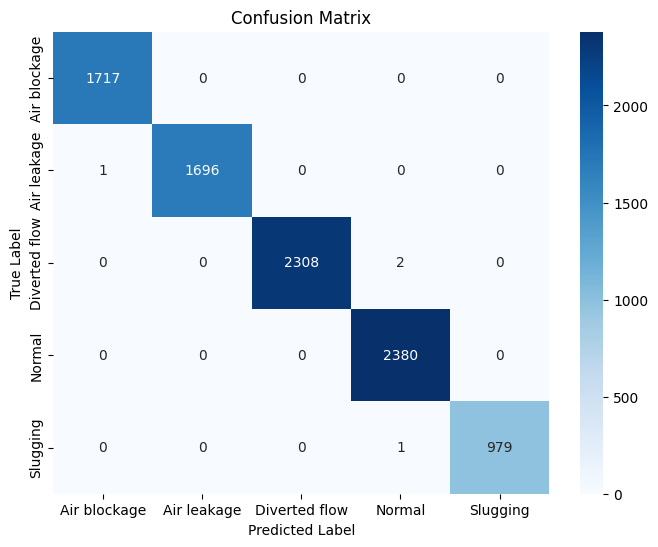

In [28]:
# Plot confusion matrix on test data 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

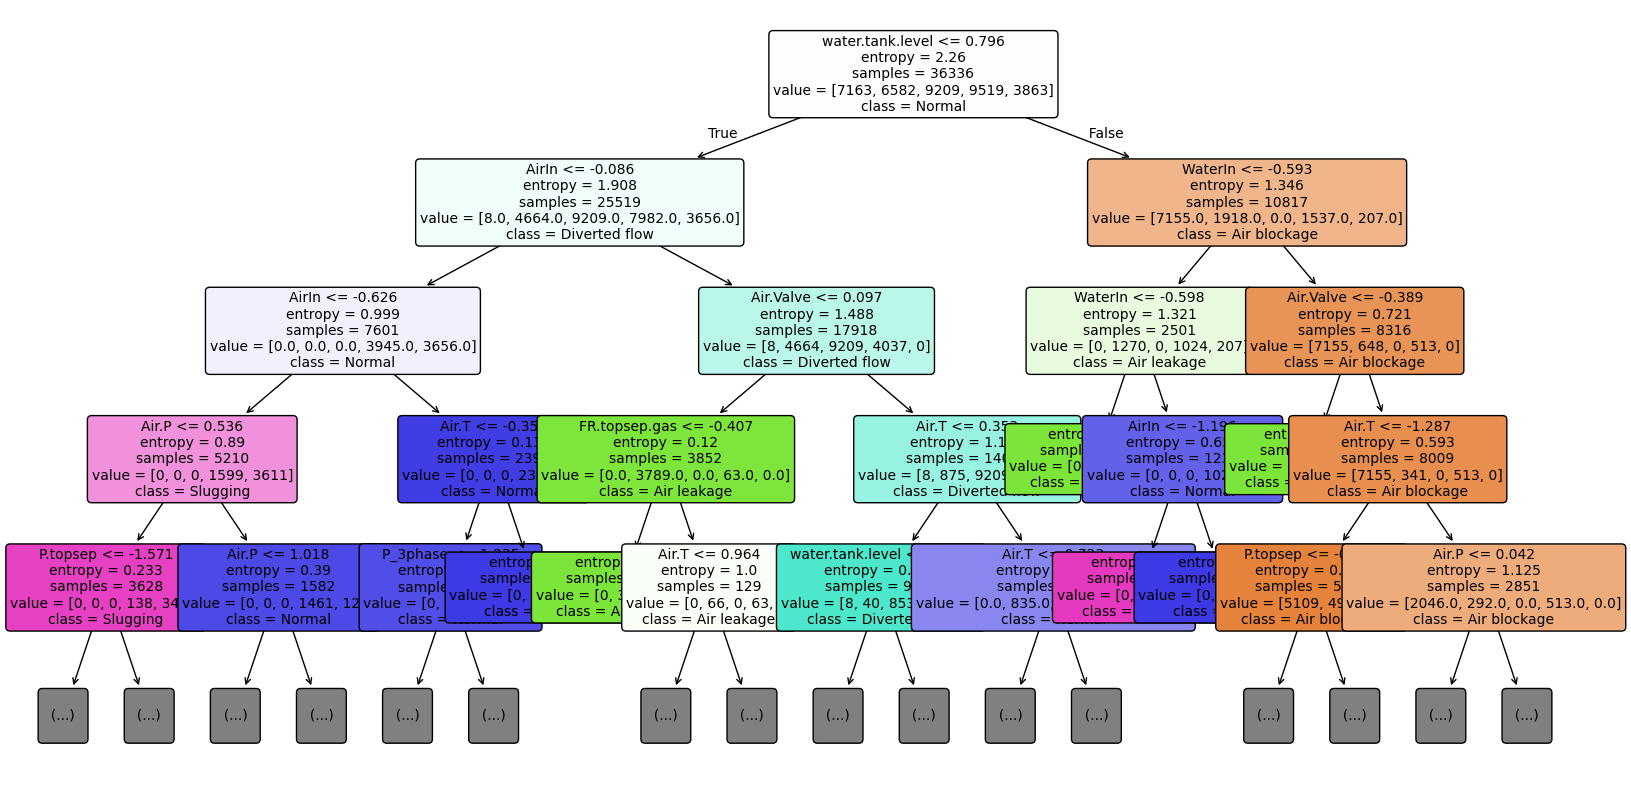

In [29]:
# Plot the tree diagram 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=selected_features_rfe, class_names=clf.classes_, filled=True, rounded=True,fontsize=10,max_depth=4)
plt.show()

Feature Importances:
 water.tank.level    0.261886
AirIn               0.222421
Air.Valve           0.144397
WaterIn             0.137502
Air.T               0.133599
Air.P               0.072613
P.topsep            0.016523
FR.topsep.gas       0.008351
P_3phase            0.002089
Mixture.zone.P      0.000620
dtype: float64


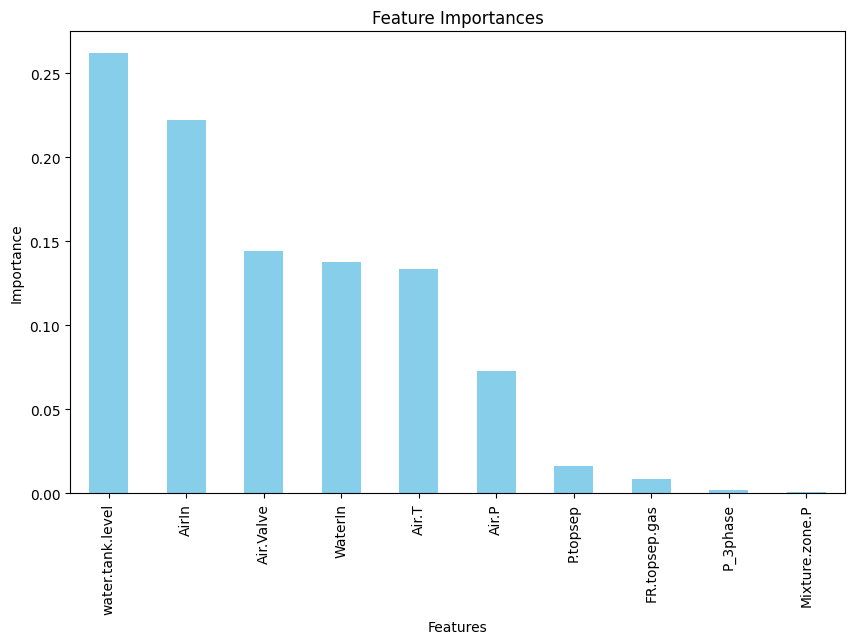

In [30]:
# Print the feature importance 
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()